# scikit-learn
* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

## 1. import

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data Analysis
* load data

In [2]:
data = pd.read_csv("./data/mnist_train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* label analysis

In [3]:
labels = range(10)
nums = []
for label in labels:
    nums.append(len(data[data['label']==label]))
print nums
print sum(nums)
# print data.label.value_counts()

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]
42000


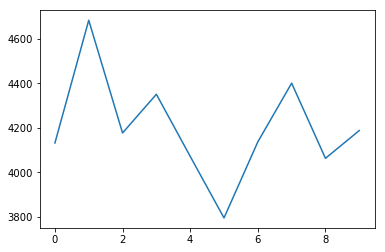

In [4]:
plt.plot(labels, nums)

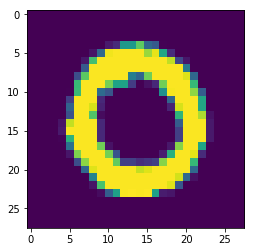

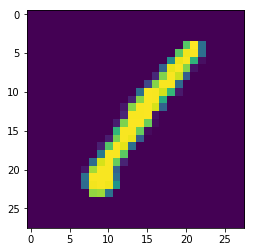

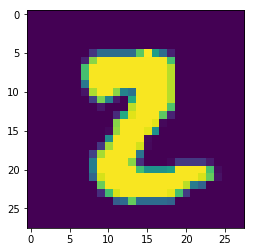

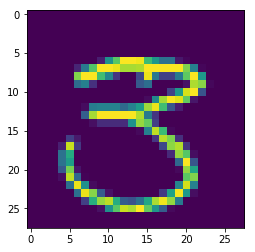

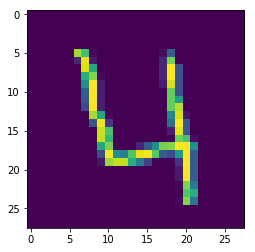

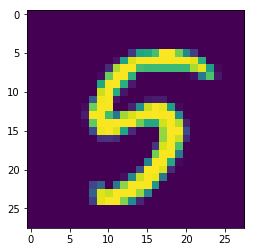

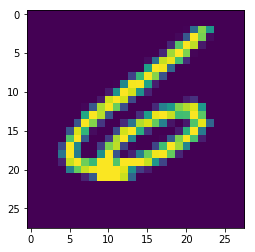

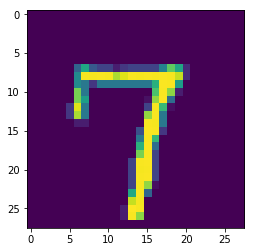

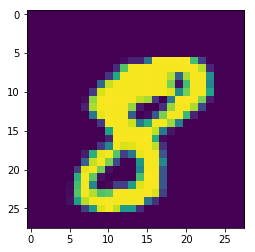

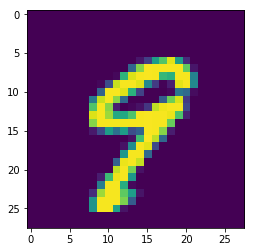

In [5]:
for label in range(10):
    image = np.array(data[data['label']==label].iloc[:1, 1:])
    image = image.reshape((28, 28))
    plt.imshow(image)
    plt.show()

In [6]:
for label in range(10):
    image = np.array(data[data['label']==label].iloc[:1, 1:])
    image = image.reshape((28, 28))
    print image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   2  89 208 135   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   5  70 254 203   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   27 189 254 230  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  28
  219 255 206   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8  94 233
  248 179  31   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 146 254 251
   84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  51 173 25

## 3. Sample data

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
train = data[:38000]
dev = data[38000:40000]
test = data[40000:]

In [9]:
train_x = data.iloc[:, 1:]
train_y = data.iloc[:, 0]
dev_x = dev.iloc[:, 1:]
dev_y = dev.iloc[:, 0]
test_x = test.iloc[:, 1:]
test_y = test.iloc[:, 0]

In [10]:
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_y.head()

0    2
1    6
2    5
3    3
4    7
Name: label, dtype: int64

## 4. Classification Model
* KNN Classifier

In [10]:
def knn_classifier(train_x, train_y):  
    from sklearn.neighbors import KNeighborsClassifier  
    model = KNeighborsClassifier()  
    model.fit(train_x, train_y)  
    return model

* Logistic Regression Classifier

In [11]:
def logistic_regression_classifier(train_x, train_y):  
    from sklearn.linear_model import LogisticRegression  
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model

* SVM Classifier 

In [12]:
def svm_classifier(train_x, train_y):  
    from sklearn.svm import SVC  
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model 

* SVM Classifier using cross validation

In [13]:
def svm_cross_validation(train_x, train_y):  
    from sklearn.grid_search import GridSearchCV  
    from sklearn.svm import SVC  
    model = SVC(kernel='rbf', probability=True)  
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}  
    grid_search = GridSearchCV(model, param_grid, n_jobs = 1, verbose=1)  
    grid_search.fit(train_x, train_y)  
    best_parameters = grid_search.best_estimator_.get_params()  
    for para, val in best_parameters.items():  
        print para, val  
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)  
    model.fit(train_x, train_y)  
    return model

* Multinomial Naive Bayes Classifier

In [14]:
def naive_bayes_classifier(train_x, train_y):  
    from sklearn.naive_bayes import MultinomialNB  
    model = MultinomialNB(alpha=0.01)  
    model.fit(train_x, train_y)  
    return model  

* Decision Tree Classifier  

In [15]:
def decision_tree_classifier(train_x, train_y):  
    from sklearn import tree  
    model = tree.DecisionTreeClassifier()  
    model.fit(train_x, train_y)  
    return model  

* Random Forest Classifier 

In [16]:
def random_forest_classifier(train_x, train_y):  
    from sklearn.ensemble import RandomForestClassifier  
    model = RandomForestClassifier(n_estimators=8)  
    model.fit(train_x, train_y)  
    return model 

* GBDT(Gradient Boosting Decision Tree) Classifier 

In [17]:
def gradient_boosting_classifier(train_x, train_y):  
    from sklearn.ensemble import GradientBoostingClassifier  
    model = GradientBoostingClassifier(n_estimators=200)  
    model.fit(train_x, train_y)  
    return model

## 5. Train

In [18]:
data_file = "./data/mnist.pkl.gz"  
thresh = 0.5  
model_save_file = None  
model_save = {}  

test_classifiers = ['NB', 'KNN', 'LR', 'RF', 'DT', 'SVM', 'GBDT']  
classifiers = {'NB':naive_bayes_classifier,   
               'KNN':knn_classifier,  
               'LR':logistic_regression_classifier,  
               'RF':random_forest_classifier,  
               'DT':decision_tree_classifier,  
               'SVM':svm_classifier,  
               'SVMCV':svm_cross_validation,  
               'GBDT':gradient_boosting_classifier  
              }

In [19]:
import time

In [20]:
is_binary_class = (len(np.unique(train_y)) == 2)
for classifier in test_classifiers:
    print '******************* %s ********************' % classifier
    start_time = time.time()
    model = classifiers[classifier](train_x, train_y)
    print 'training took %fs!' % (time.time() - start_time)
    predict = model.predict(test_x)  
    if model_save_file != None:
        model_save[classifier] = model
    if is_binary_class:
        precision = metrics.precision_score(test_y, predict)
        recall = metrics.recall_score(test_y, predict)
        print 'precision: %.2f%%, recall: %.2f%%' % (100 * precision, 100 * recall)
    accuracy = metrics.accuracy_score(test_y, predict)
    print 'accuracy: %.2f%%' % (100 * accuracy)

******************* NB ********************
training took 0.333000s!
accuracy: 83.60%
******************* KNN ********************
training took 31.834000s!
accuracy: 98.25%
******************* LR ********************
training took 3157.498000s!
accuracy: 93.10%
******************* RF ********************
training took 3.200000s!
accuracy: 99.90%
******************* DT ********************
training took 12.567000s!
accuracy: 100.00%
******************* SVM ********************
training took 17807.573000s!
accuracy: 100.00%
******************* GBDT ********************
training took 2087.540000s!
accuracy: 98.95%


## 6. Cluster Model
* k-means

In [12]:
def k_means(train_x):  
    from sklearn.cluster import KMeans
    model = KMeans(10)  
    model.fit(train_x)  
    return model

* DBSCAN

In [13]:
def dbscan(train_x):  
    from sklearn.cluster import DBSCAN
    model = DBSCAN(10)  
    model.fit(train_x)  
    return model

## 7. fit

In [14]:
model = k_means(train_x)

In [16]:
cluster_label = model.predict(train_x)
pd.Series(cluster_label).value_counts()

0    6409
2    6044
7    5276
3    4635
1    4085
4    3987
6    3920
8    3233
5    2217
9    2194
dtype: int64

In [17]:
def get_count(stat_count):
    count = []
    for i in range(10):
        try:
            count.append(stat_count[i])
        except:
            count.append(0)
    return count

0


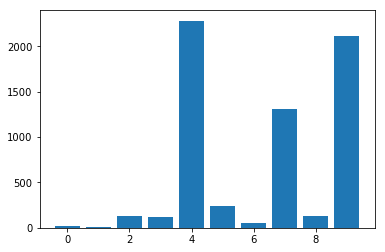

1


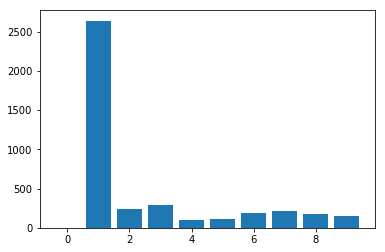

2


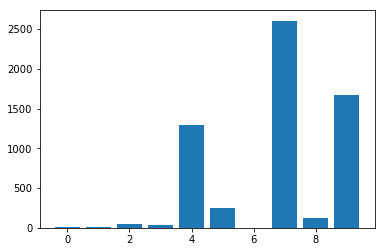

3


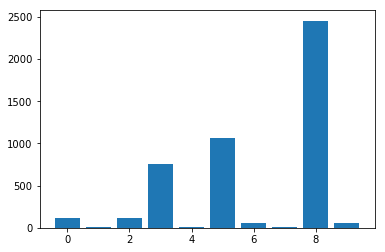

4


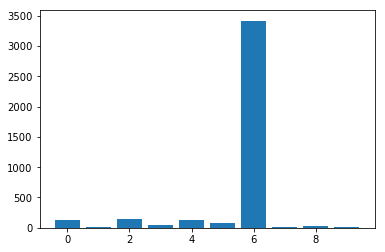

5


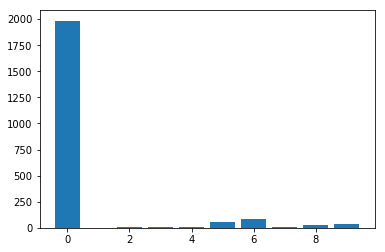

6


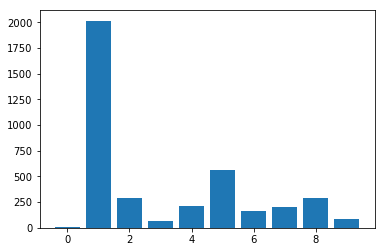

7


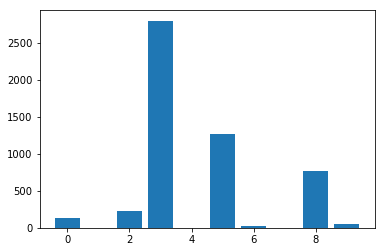

8


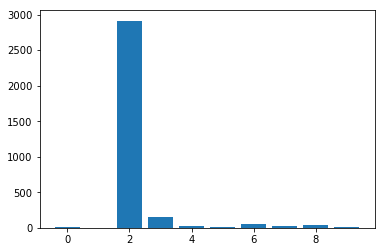

9


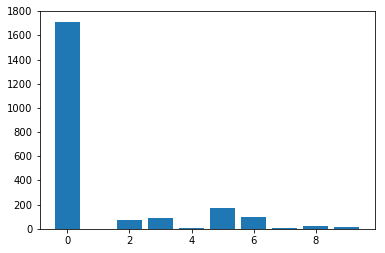

In [18]:
for label in range(10):
    print label
    plt.bar(range(10), get_count(train_y[cluster_label==label].value_counts()))
    plt.show()

In [ ]:
model = dbscan(train_x)

In [ ]:
cluster_label = model.predict(train_x)
pd.Series(cluster_label).value_counts()

In [ ]:
for label in range(10):
    print label
    plt.bar(range(10), get_count(train_y[cluster_label==label].value_counts()))
    plt.show()

## 8. Dimensionality reduction

In [12]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=10)
X_r = pca.fit(train_x).transform(train_x)

In [27]:
np.shape(X_r)

(42000L, 10L)

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
lda = LatentDirichletAllocation(10)

In [30]:
lda.fit(train_x)

E:\Anaconda2\lib\site-packages\sklearn\decomposition\online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=10, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [31]:
lda.transform(train_x)

array([[  1.84465825e-01,   2.27600179e-06,   2.27600045e-06, ...,
          3.13325858e-01,   2.27585296e-06,   1.90118479e-01],
       [  5.11579120e-02,   2.55532710e-06,   1.57479048e-01, ...,
          2.55498436e-06,   5.94255327e-02,   6.00133910e-01],
       [  5.16056247e-06,   2.92957471e-01,   1.95413076e-01, ...,
          5.15952859e-06,   5.15999313e-06,   5.16020307e-06],
       ..., 
       [  1.76568119e-01,   3.73474858e-01,   4.00787874e-02, ...,
          2.95670844e-06,   3.20243415e-02,   1.93545758e-02],
       [  2.44371397e-01,   2.42771341e-01,   2.62683297e-05, ...,
          1.21108180e-01,   2.99345198e-06,   2.99380208e-06],
       [  1.49060834e-02,   7.62298031e-01,   4.35433227e-06, ...,
          4.35442827e-06,   4.35406667e-06,   4.35473655e-06]])

## 9. Cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.4, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(data.iloc[:, 1:], data.iloc[:, 0], cv=5)